<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/AutoEncoder_GAN_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(42)
np.random.seed(42)

#UnderComplete_AutoEncoder_PCA

In [5]:
#3 -> 2
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])
#2 -> 3
decoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[2])
])
autoencoder = keras.models.Sequential([
    encoder,
    decoder
])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [13]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m,3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

    return data

X_train = generate_3d_data(60)
#(3, )
#print(X_train.mean(axis=0, keepdims=0).shape)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

(3,)


In [14]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 8ms/step - loss: 0.9995
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6578
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.5046
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.4215
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.3697
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3352
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3104
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2915
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2762
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2643
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2518
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2412
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

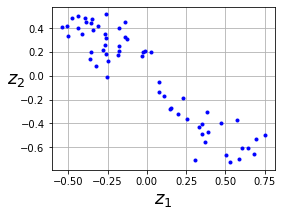

In [19]:
codings = encoder.predict(X_train)

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()